In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from utils import *

In [3]:
train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('test_dataset.csv')

In [4]:
sample = pd.read_csv('sample_submission.csv')

In [5]:
bin_ranges = ranges[:-1]

In [7]:
full_ranges = powerset(bin_ranges)
len(full_ranges)

16

In [24]:
nb = BernoulliNB(alpha=.5)
insample_scores = []
outsample_scores = []
insample_evaluates = []
outsample_evaluates = []
com_cats = []
for rid, com_range in enumerate(full_ranges[1:]):
    print(rid)
    col_ids = list_sum(x[1] for x in com_range)
    com_cat = string_sum(x[0] for x in com_range)
    errors = get_score_evaluate(
        train.iloc[:, col_ids].values,
        train.loc[:, 'fault_severity'].values,
        nb,
        random_state=487)
    insample_scores.append(errors[0])
    outsample_scores.append(errors[1])
    insample_evaluates.append(errors[2])
    outsample_evaluates.append(errors[3])
    com_cats.append(com_cat)
res = pd.DataFrame(
    {'insample_scores': insample_scores, 
     'outsample_scores': outsample_scores,
     'insample_evaluates': insample_evaluates,
     'outsample_evaluates': outsample_evaluates}, index=com_cats)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


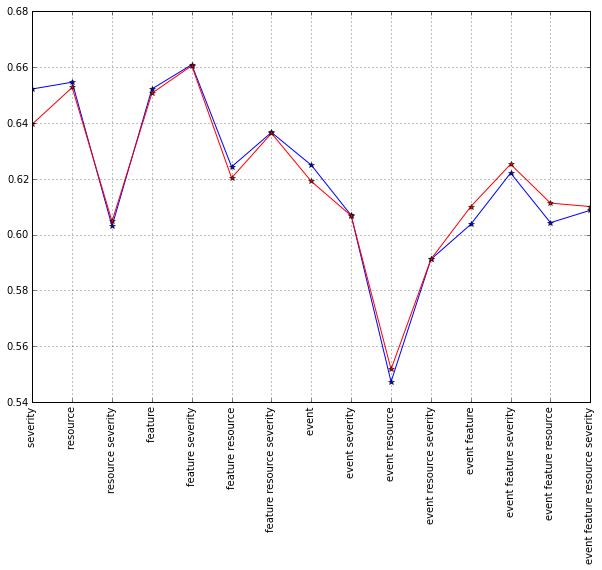

In [25]:
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
res.loc[:, 'insample_scores'].plot(kind='line', ax=ax, rot=90, marker='*')
res.loc[:, 'outsample_scores'].plot(kind='line', ax=ax, color='r', rot=90, marker='*')
plt.xticks(range(len(res.index)), res.index)
plt.grid()
plt.show()

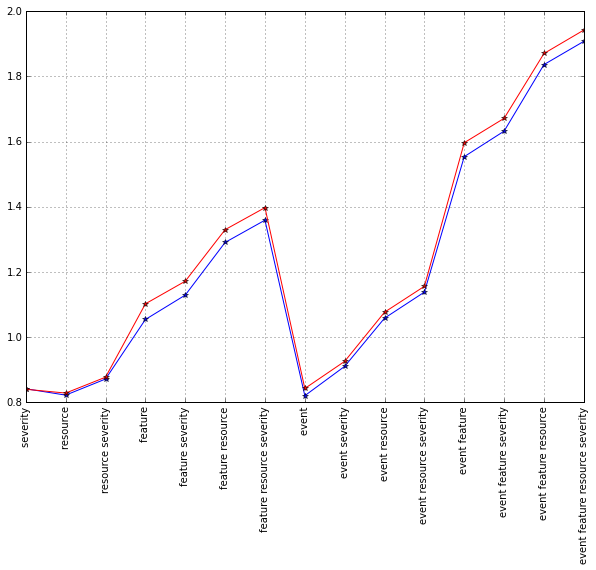

In [26]:
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
res.loc[:, 'insample_evaluates'].plot(kind='line', ax=ax, rot=90, marker='*')
res.loc[:, 'outsample_evaluates'].plot(kind='line', ax=ax, color='r', rot=90, marker='*')
plt.xticks(range(len(res.index)), res.index)
plt.grid()
plt.show()